In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [15]:
# Compare the images
def compare_images(imageA, imageB):
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB, multichannel=True, channel_axis=2, data_range=255)
    p = psnr(imageA, imageB, data_range=255)
    return m, s, p

In [6]:
# Prepare data
np.random.seed(42)

def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            images.append(img)
    return images


hr_images = load_images('Dataset/Resized/')
lr_images = load_images('Dataset/Processed/')

combined_data = list(zip(lr_images, hr_images))
train_data, test_data = train_test_split(combined_data, test_size=0.2)

X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

X_train = np.array([np.array(img) for img in X_train])
y_train = np.array([np.array(img) for img in y_train])
X_test = np.array([np.array(img) for img in X_test])
y_test = np.array([np.array(img) for img in y_test])

In [7]:
# Build the SRCNN model
def build_model():
    SRCNN = tf.keras.Sequential(name='SRCNN')
    SRCNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='SAME', use_bias=True, input_shape=(None, None, 3)))
    SRCNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                     padding='SAME',
                                     use_bias=True,
                                     kernel_initializer='glorot_uniform',
                                     activation='relu'))
    SRCNN.add(tf.keras.layers.Conv2D(filters=3, kernel_size=(5, 5),
                                     padding='SAME',
                                     use_bias=True,
                                     kernel_initializer='glorot_uniform',
                                     activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
    SRCNN.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN

In [8]:
# Train the model
srcnn_model = build_model()
srcnn_model.summary()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "SRCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, None, None,     │        31,232 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, None, None, 64) │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, None, None, 3)  │         4,803 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,827 (429.01 KB)

 Trainable params: 109,827 (429.01 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 256, 256, 3), (80, 256, 256, 3), (20, 256, 256, 3), (20, 256, 256, 3))

In [10]:
srcnn_model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 21551.1875 - mean_squared_error: 21551.1875 - val_loss: 13584.9502 - val_mean_squared_error: 13584.9502
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 13362.4980 - mean_squared_error: 13362.5000 - val_loss: 7510.2998 - val_mean_squared_error: 7510.2998
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 7352.5674 - mean_squared_error: 7352.5674 - val_loss: 3339.5007 - val_mean_squared_error: 3339.5007
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 3215.5449 - mean_squared_error: 3215.5449 - val_loss: 2226.4224 - val_mean_squared_error: 2226.4224
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 2117.9976 - mean_squared_error: 2117.9973 - val_loss: 3610.7649 - val_mean_squared_error: 3610.7649
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 3530.9937 - mean_squared_error: 3530.9937 - val_loss: 4172.8965 - val_mean_squared_error: 4172.8960
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 

# Predict the images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


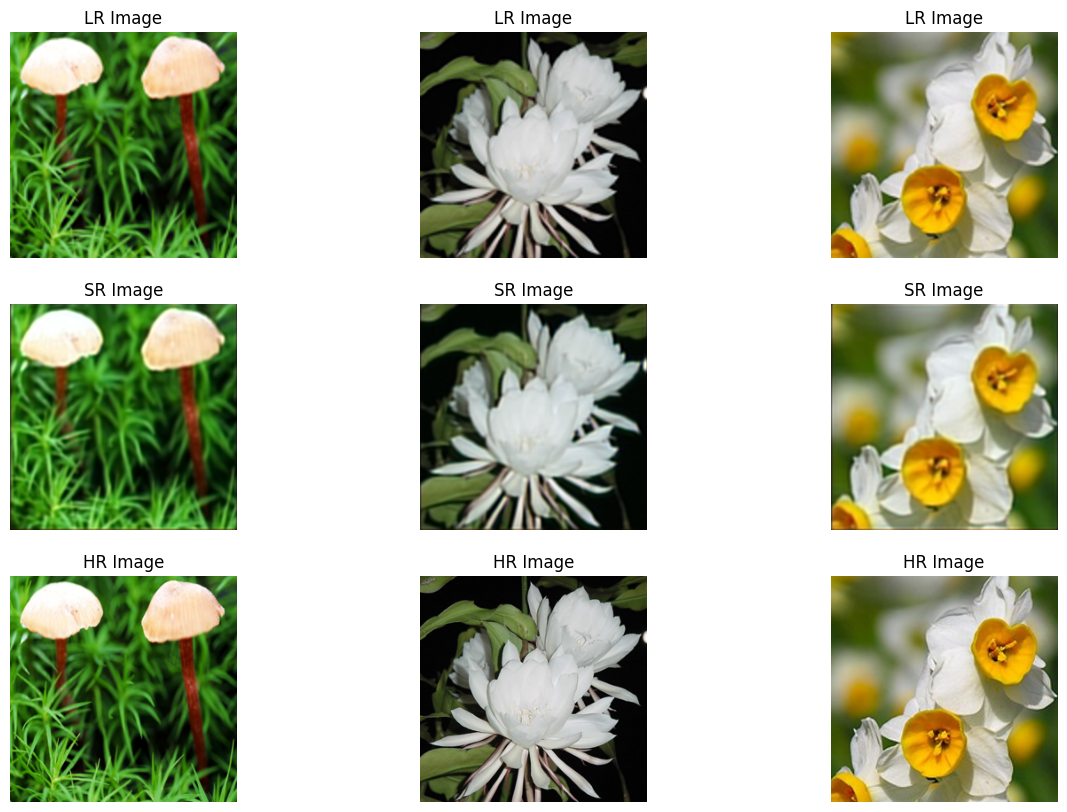

In [11]:
def predict(image, model):
    image = np.array(image)
    image = image.astype(np.float32)
    image /= 255.
    image = np.expand_dims(image, axis=0)
    sr = model.predict(image)
    sr *= 255.
    sr = np.clip(sr, 0, 255).astype(np.uint8)
    return sr[0]

def predict_images(images, model):
    sr_images = []
    for img in images:
        sr_images.append(predict(img, model))
    return sr_images

# Plotting the images
sr_test_images = predict_images(X_test, srcnn_model)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i in range(3):
    axs[0, i].imshow(X_test[i])
    axs[0, i].set_title('LR Image')
    axs[0, i].axis('off')

    axs[1, i].imshow(sr_test_images[i])
    axs[1, i].set_title('SR Image')
    axs[1, i].axis('off')
    
    axs[2, i].imshow(y_test[i])
    axs[2, i].set_title('HR Image')
    axs[2, i].axis('off')

In [16]:
# Evaluate the model
psnr_values = []
ssim_values = []
mse_values = []

for i in range(len(sr_test_images)):
    m, s, p = compare_images(y_test[i], sr_test_images[i])
    psnr_values.append(p)
    ssim_values.append(s)
    mse_values.append(m)

print('Average PSNR:', np.mean(psnr_values))
print('Average SSIM:', np.mean(ssim_values))
print('Average MSE:', np.mean(mse_values))


Average PSNR: 24.703660846253296
Average SSIM: 0.8119186844689473
Average MSE: 254.78922170003256
